In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy.citipy as citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | zalantun
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | yashkul
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | aflu
City not found. Skipping...
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | gariaband
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | kaina
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hauterive
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | asau
Processing Record 23 of Set 1 | cherskiy
Processing Record 

Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | sola
Processing Record 44 of Set 4 | utiroa
City not found. Skipping...
Processing Record 45 of Set 4 | novonikolayevskiy
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | tigao
Processing Record 49 of Set 4 | abu samrah
Processing Record 50 of Set 4 | mishelevka
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | olinda
Processing Record 3 of Set 5 | urazovo
Processing Record 4 of Set 5 | ilaskhan-yurt
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | mehamn
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | santa marinella
Processing Record 9 of Set 5 | bairiki
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | sterling
Processing Record 12 of Set 5 | aga

Processing Record 29 of Set 8 | houma
Processing Record 30 of Set 8 | kirakira
Processing Record 31 of Set 8 | jiayuguan
Processing Record 32 of Set 8 | xining
Processing Record 33 of Set 8 | penzance
Processing Record 34 of Set 8 | mayo
Processing Record 35 of Set 8 | betsiamites
Processing Record 36 of Set 8 | stavern
Processing Record 37 of Set 8 | port elizabeth
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | matiri
Processing Record 42 of Set 8 | khandyga
Processing Record 43 of Set 8 | hihifo
City not found. Skipping...
Processing Record 44 of Set 8 | pasighat
Processing Record 45 of Set 8 | tralee
Processing Record 46 of Set 8 | godo
Processing Record 47 of Set 8 | avera
Processing Record 48 of Set 8 | narsaq
Processing Record 49 of Set 8 | pangnirtung
Processing Record 50 of Set 8 | romanovka
Processing Record 1 of Set 9 | iracoubo
Processing Record 2 of Set 9 | jijiga
Pr

Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | altay
Processing Record 25 of Set 12 | richards bay
Processing Record 26 of Set 12 | cidreira
Processing Record 27 of Set 12 | dukat
Processing Record 28 of Set 12 | ivankiv
Processing Record 29 of Set 12 | lapeer
Processing Record 30 of Set 12 | ixtapa
Processing Record 31 of Set 12 | bowen
Processing Record 32 of Set 12 | tumut
Processing Record 33 of Set 12 | chardara
Processing Record 34 of Set 12 | guerrero negro
Processing Record 35 of Set 12 | cascais
Processing Record 36 of Set 12 | hendaye
Processing Record 37 of Set 12 | xiongshi
City not found. Skipping...
Processing Record 38 of Set 12 | padang
Processing Record 39 of Set 12 | lefka
Processing Record 40 of Set 12 | la gomera
Processing Record 41 of Set 12 | kapoeta
Processing Record 42 of Set 12 | andenes
Processing Record 43 of Set 12 | machiques
Processing Record 44 of Set 12 | fukue
Processing Record 45 of Set 12 | carbonia
Processing Record 46 o

In [9]:
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,58.37,66,6,8.66,UY,2022-02-14 03:14:28
1,Butaritari,3.0707,172.7902,81.00,78,51,12.15,KI,2022-02-14 03:16:53
2,Hobart,-42.8794,147.3294,71.28,70,100,11.50,AU,2022-02-14 03:17:52
3,Hermanus,-34.4187,19.2345,66.90,78,80,18.34,ZA,2022-02-14 03:18:56
4,Zalantun,48.0000,122.7167,4.41,72,36,5.28,CN,2022-02-14 03:18:56
5,Cabo San Lucas,22.8909,-109.9124,73.71,46,0,5.75,MX,2022-02-14 03:17:51
6,Saldanha,-33.0117,17.9442,64.45,90,0,13.27,ZA,2022-02-14 03:18:41
7,Yashkul,46.1711,45.3435,31.19,62,0,6.22,RU,2022-02-14 03:18:57
8,Avarua,-21.2078,-159.7750,77.05,88,20,8.05,CK,2022-02-14 03:18:38
9,Meulaboh,4.1363,96.1285,82.29,72,96,3.36,ID,2022-02-14 03:18:57


In [11]:
# Reorder the columns
city_data_df_new_col = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_new_col]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-02-14 03:14:28,-33.6971,-53.4616,58.37,66,6,8.66
1,Butaritari,KI,2022-02-14 03:16:53,3.0707,172.7902,81.00,78,51,12.15
2,Hobart,AU,2022-02-14 03:17:52,-42.8794,147.3294,71.28,70,100,11.50
3,Hermanus,ZA,2022-02-14 03:18:56,-34.4187,19.2345,66.90,78,80,18.34
4,Zalantun,CN,2022-02-14 03:18:56,48.0000,122.7167,4.41,72,36,5.28


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities2.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

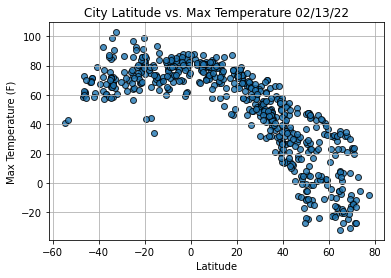

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

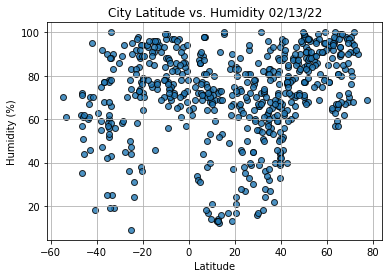

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

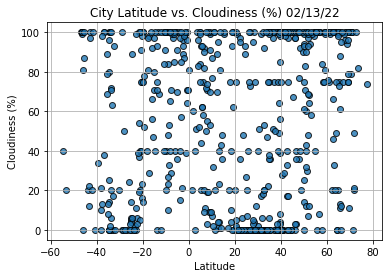

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

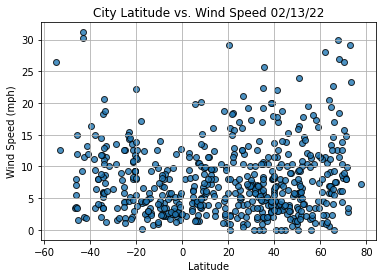

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
# Create a Linear Regression Function

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create the Hemisphere DataFrames

index13 = city_data_df.loc[13]
index13

City                        Kaina
Country                        NG
Date          2022-02-14 03:18:58
Lat                       12.6374
Lng                        8.5873
Max Temp                    57.88
Humidity                       14
Cloudiness                      1
Wind Speed                   7.23
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
571    False
572     True
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2022-02-14 03:16:53,3.0707,172.7902,81.00,78,51,12.15
4,Zalantun,CN,2022-02-14 03:18:56,48.0000,122.7167,4.41,72,36,5.28
5,Cabo San Lucas,MX,2022-02-14 03:17:51,22.8909,-109.9124,73.71,46,0,5.75
7,Yashkul,RU,2022-02-14 03:18:57,46.1711,45.3435,31.19,62,0,6.22
9,Meulaboh,ID,2022-02-14 03:18:57,4.1363,96.1285,82.29,72,96,3.36


In [23]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-02-14 03:14:28,-33.6971,-53.4616,58.37,66,6,8.66
2,Hobart,AU,2022-02-14 03:17:52,-42.8794,147.3294,71.28,70,100,11.50
3,Hermanus,ZA,2022-02-14 03:18:56,-34.4187,19.2345,66.90,78,80,18.34
6,Saldanha,ZA,2022-02-14 03:18:41,-33.0117,17.9442,64.45,90,0,13.27
8,Avarua,CK,2022-02-14 03:18:38,-21.2078,-159.7750,77.05,88,20,8.05


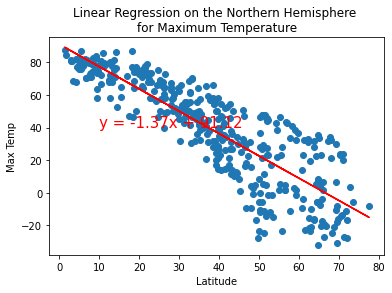

In [25]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

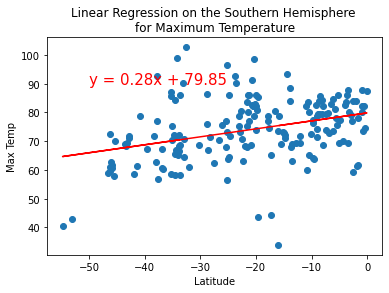

In [26]:
#Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

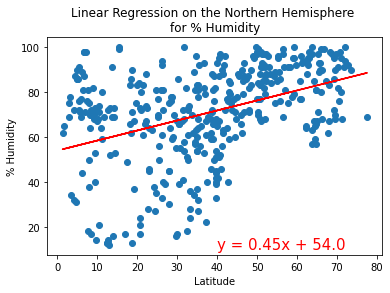

In [27]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

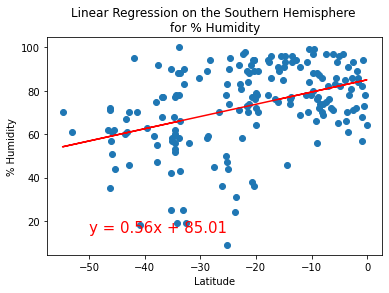

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

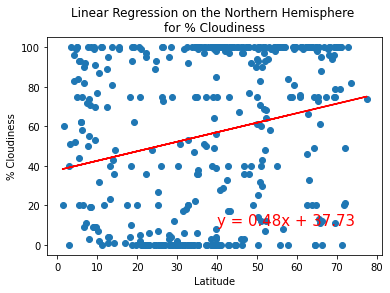

In [29]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

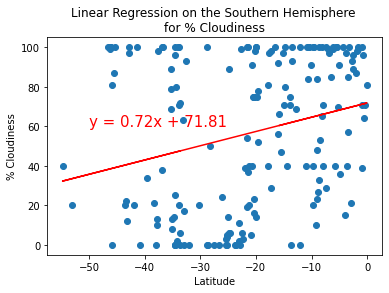

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

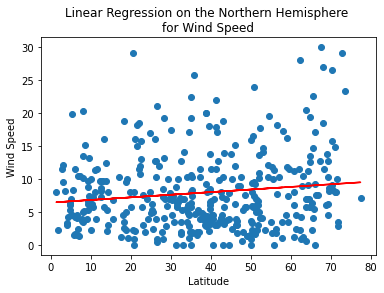

In [31]:
# 6.4.5 Find the Correlation Between Latitude and Wind Speed

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

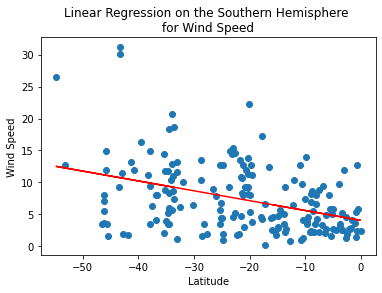

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))